# <h1 align=center> Case Challenge - Belvo Data Analyst Intern </h1>

-------------------------------------------------------------------------------

Categories:
<ol>

<li> Deposits</li>
<li> Home & Life</li>
<li> Food & Groceries</li>
<li> Online Platforms & Leisure</li>
<li> Transport & Travel</li>
<li> Personal Shopping</li>
<li> Taxes</li>
<li> Withdrawal & ATM</li>
<li> Credits & Loans</li>
<li> Bills & Utilities</li>
<li> Investments & Savings</li>
<li> Fees & Charges</li>
<li> Income & Payments</li>
<li> Transfers</li>

</ol>

First, I'm importing all the python libraries that I'm going to use to analise this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
import re

Let's call the dataset now

In [2]:
df = pd.read_csv('txs_to_categorize_unlabeled_PT.csv', parse_dates=['date'])
#df.columns = df.columns.str.replace(' ', "_")
df

,internal_id,description,date,amount,movement_type,currency
0,5aa36d114177bbc74215c1a105bee000,Cdl Itamambuca Materia,2021-03-21,29.00,G,BRL
1,450286f67c958af64b50cf920a9ec597,Pagto conta telefone SKY SERVICOS,2020-12-14,353.50,G,BRL
2,e732c0359dc3b5de423223ca1f5929d9,Ifd*ifood,2021-03-26,46.00,G,BRL
3,0a1e5cadc6ddb24a41e0186924612628,Pg *paccoby 01/06,2021-03-28,106.60,G,BRL
4,1022ef409226b5bf4939b9861f700231,Pagamento de Boleto NEON PAGAMENTOS S.A.,2020-10-23,81.00,G,BRL
...,...,...,...,...,...,...
174,7406968ea990a93c4d7d6e201ee80f6c,Compra com Cartão 27/02 18:05 Shopping Aldeota,2021-03-01,35.80,G,BRL
175,b12e53aa5f98a29a49852e5e047e01f9,"SAQUE INTER US$ 77,25",2020-12-31,426.13,G,BRL
176,05232ce932628c984adbd50121ec4841,SISPAG PIX TRANSFERENCI,2021-03-29,300.00,G,BRL
177,077fd95846af9cd545970c670efd614e,Supermercados Ange01/04,2021-03-26,69.89,G,BRL


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   internal_id    179 non-null    object        
 1   description    179 non-null    object        
 2   date           179 non-null    datetime64[ns]
 3   amount         179 non-null    float64       
 4   movement_type  179 non-null    object        
 5   currency       179 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 8.5+ KB


In [4]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,internal_id,description,date,amount,movement_type,currency
count,179,179,179,179.000000,179,179
unique,179,176,109,NaN,2,1
top,60bacc8cf8f4a92b4071a4320967a379,Pagamento de Boleto BANCO PSA FINANCE BRASIL SA,2021-03-26 00:00:00,NaN,G,BRL
freq,1,2,14,NaN,150,179
first,NaN,NaN,2020-04-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2021-03-30 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,1074.597095,NaN,NaN
std,NaN,NaN,NaN,2251.228071,NaN,NaN
min,NaN,NaN,NaN,0.010000,NaN,NaN
25%,NaN,NaN,NaN,57.950000,NaN,NaN


## Amount

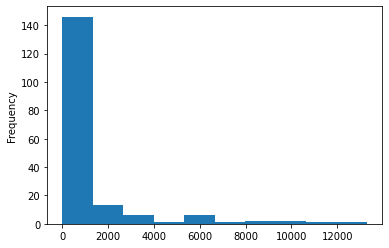

In [5]:
df['amount'].plot(kind='hist')

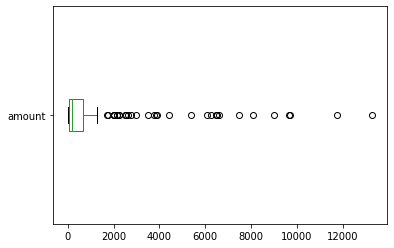

In [6]:
df['amount'].plot(kind='box', vert=False)

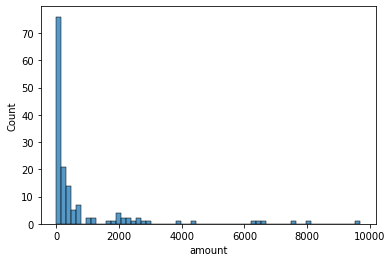

In [7]:
mov_G = df[df['movement_type'] == 'G']['amount']
mov_N = df[df['movement_type'] == 'N']['amount']
srn.histplot(mov_G)

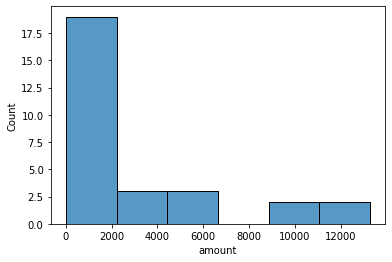

In [8]:
srn.histplot(mov_N)

## Movement type

In [9]:
df[df['movement_type'] == 'G'][['amount','description']].head(20)

,amount,description
0,29.00,Cdl Itamambuca Materia
1,353.50,Pagto conta telefone SKY SERVICOS
2,46.00,Ifd*ifood
3,106.60,Pg *paccoby 01/06
4,81.00,Pagamento de Boleto NEON PAGAMENTOS S.A.
6,7.50,Jmp Cafeteria
10,123.60,Pagamento de Boleto BANCO INTER
13,200.95,Zona Sul Fl 06
14,756.80,Pagamento de Boleto BANCO PSA FINANCE BRASIL SA
16,1750.00,INT TED 033154110020877


In [10]:
df[df['movement_type'] == 'G'][['amount']].sum()

amount    113774.58
dtype: float64

In [11]:
df[df['movement_type'] == 'N'][['amount']].sum()

amount    78578.3
dtype: float64

In [12]:
df[df['movement_type'] == 'N'][['amount','description']]

,amount,description
5,19.61,TED 104.0000CAIXA ECON F
7,275.39,SISPAG PORTO SEG CIA SE
8,13292.25,PAGTO PENSAO ALIMENTICIA
9,195.75,PAGAMENTO CARTAO DE DEBITO GETNET-MAESTRO
11,451.42,REDE MAST DB036703192
12,118.35,TED 237.2372ODONTOPREV S
15,600.16,REMUNERACAO/SALARIO
18,3750.65,SISPAG CDT SOL MEIOS PA
22,100.15,SISPAG
26,6491.00,SISPAG ATUAR SOLUCOES S


## Descriçao


Most important words

In [13]:
df_2 = df.copy()

In [14]:
numeros = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for numero in numeros:
  df_2['description'] = df_2['description'].apply(lambda descricao: descricao.replace(numero,' '))
specialChars = "!#$%^&*/,:()" 
for specialChar in specialChars:
  df_2['description'] = df_2['description'].apply(lambda descricao: descricao.replace(specialChar, ' '))
  
df_2        

,internal_id,description,date,amount,movement_type,currency
0,5aa36d114177bbc74215c1a105bee000,Cdl Itamambuca Materia,2021-03-21,29.00,G,BRL
1,450286f67c958af64b50cf920a9ec597,Pagto conta telefone SKY SERVICOS,2020-12-14,353.50,G,BRL
2,e732c0359dc3b5de423223ca1f5929d9,Ifd ifood,2021-03-26,46.00,G,BRL
3,0a1e5cadc6ddb24a41e0186924612628,Pg paccoby,2021-03-28,106.60,G,BRL
4,1022ef409226b5bf4939b9861f700231,Pagamento de Boleto NEON PAGAMENTOS S.A.,2020-10-23,81.00,G,BRL
...,...,...,...,...,...,...
174,7406968ea990a93c4d7d6e201ee80f6c,Compra com Cartão Shopping Aldeota,2021-03-01,35.80,G,BRL
175,b12e53aa5f98a29a49852e5e047e01f9,SAQUE INTER US,2020-12-31,426.13,G,BRL
176,05232ce932628c984adbd50121ec4841,SISPAG PIX TRANSFERENCI,2021-03-29,300.00,G,BRL
177,077fd95846af9cd545970c670efd614e,Supermercados Ange,2021-03-26,69.89,G,BRL


In [15]:
df_2['description'] = df_2['description'].apply(lambda texto: texto.upper())
df_2['description_words'] = df_2['description'].str.split()
df_2

,internal_id,description,date,amount,movement_type,currency,description_words
0,5aa36d114177bbc74215c1a105bee000,CDL ITAMAMBUCA MATERIA,2021-03-21,29.00,G,BRL,"[CDL, ITAMAMBUCA, MATERIA]"
1,450286f67c958af64b50cf920a9ec597,PAGTO CONTA TELEFONE SKY SERVICOS,2020-12-14,353.50,G,BRL,"[PAGTO, CONTA, TELEFONE, SKY, SERVICOS]"
2,e732c0359dc3b5de423223ca1f5929d9,IFD IFOOD,2021-03-26,46.00,G,BRL,"[IFD, IFOOD]"
3,0a1e5cadc6ddb24a41e0186924612628,PG PACCOBY,2021-03-28,106.60,G,BRL,"[PG, PACCOBY]"
4,1022ef409226b5bf4939b9861f700231,PAGAMENTO DE BOLETO NEON PAGAMENTOS S.A.,2020-10-23,81.00,G,BRL,"[PAGAMENTO, DE, BOLETO, NEON, PAGAMENTOS, S.A.]"
...,...,...,...,...,...,...,...
174,7406968ea990a93c4d7d6e201ee80f6c,COMPRA COM CARTÃO SHOPPING ALDEOTA,2021-03-01,35.80,G,BRL,"[COMPRA, COM, CARTÃO, SHOPPING, ALDEOTA]"
175,b12e53aa5f98a29a49852e5e047e01f9,SAQUE INTER US,2020-12-31,426.13,G,BRL,"[SAQUE, INTER, US]"
176,05232ce932628c984adbd50121ec4841,SISPAG PIX TRANSFERENCI,2021-03-29,300.00,G,BRL,"[SISPAG, PIX, TRANSFERENCI]"
177,077fd95846af9cd545970c670efd614e,SUPERMERCADOS ANGE,2021-03-26,69.89,G,BRL,"[SUPERMERCADOS, ANGE]"


In [16]:
# Função de achar palavras
def selecionar_palavra(descricao, palavras):
  for pal in descricao:
    for palavra in palavras:
      if re.findall(palavra, pal):
        return 1
  return 0


# Função de ver o tipo de movimentação
def qual_tipo(tipo, valor):
  if tipo == valor:
    return 1
  else: 
    return 0

# 1. finding Deposits
depo_palavras = ['NNNNNNNN']
df_2['deposits'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, depo_palavras))
# DEB AUTOMATICO
debAuto_palavras = ['DEB','AUTOR', 'DEBIT']
df_2['debAuto'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, debAuto_palavras))

# 2. Finding Home & Life
home_palavras = ['CASA','MATERIA']
df_2['home'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, home_palavras))

# 3. Finding Food & Groceries
food_palavras = ['MERCA','SUPERME','MERCADO','IFOOD', 'UBER EATS' 'RAPPI', 'RESTAURANTE$', 'ATACAD', 'CARREFOUR', 'PAULISTAO', 'CAFE', 'FRANGO']
df_2['food'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, food_palavras))

# 4. Finding Online Platforms & Leisure
online_palavras = ['ONLINE', 'INTERNET', 'EBANX', 'MERCPAG', 'COM ']
df_2['online'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, online_palavras))

# 5. finding Transport & Travel
transp_palavras = ['HOTEL','HOSTEL', 'CARRO', 'HOTEIS', 'ESTACIONAM', 'UBER', 'TRANSP']
df_2['transp'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, transp_palavras))

# 6. Finding Personal Shopping
personal_palavras = ['SHOP']
df_2['personal'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, personal_palavras))

# 7. Finding Taxes
taxes_palavras = ['DARF', 'IOF', 'GRF']
df_2['taxes'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, taxes_palavras))

# 8. Finding Withdrawal & ATM
saque_palavras = ['SAQUE', 'ATM']
df_2['withdrawal'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, saque_palavras))

# 9. finding Credits & Loans
# CARTÃO
cartao_palavras = ['CARTAO', 'CARTÃO']
df_2['cartao'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, cartao_palavras))

# 10. Finding Bills & Utilities
bills_palavras = ['TIM', 'VIVO', 'CLARO', 'OI', 'SKY', 'CONTA', 'NET', 'BILL']
df_2['bills'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, bills_palavras))
boleto_palavras = ['BOLET']
df_2['boleto'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, boleto_palavras))


# 11. finding Investments & Savings
# APLIC
aplic_palavras = ['APLIC', 'RESGAT']
df_2['aplic'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, aplic_palavras))

# 12. Fees & Charges
fees_palavras = ['ATMR', 'ANUIDAD', 'TARIFA', 'TAR', 'BANCO']
df_2['fees'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, fees_palavras))


# 13. fINDING Income & Payments
df_2['income'] = df_2['movement_type'].apply(lambda tipo: qual_tipo(tipo, 'N'))
# OUTROS
# BOLETO

# PAGAMENTO
pagto_palavras = ['PAGAMENTO', 'PAGTO', 'PGTO', 'PAG', 'PG']
df_2['pagto'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, pagto_palavras))

# 14. Finding Transfers
trans_palavras = ['TRANSF', 'PIX', 'TBI', 'TED', 'DOC', 'SISPAG']
df_2['transfer'] = df_2['description_words'].apply(lambda descricao: selecionar_palavra(descricao, trans_palavras))



In [17]:
colunas = ['withdrawal','deposits','fees','income', 'personal', 'aplic','bills', 'food', 'transfer', 'debAuto','home','taxes','pagto', 'online', 'transp', 'cartao', 'boleto']
df_2['soma'] = df_2[colunas].sum(axis=1)

In [18]:
# Outros
df_2['outros'] = df_2['soma'].apply(lambda soma: qual_tipo(soma, 0)) 
colunas.append('outros')

In [19]:
df_2

,internal_id,description,date,amount,movement_type,currency,description_words,deposits,debAuto,home,food,online,transp,personal,taxes,withdrawal,cartao,bills,boleto,aplic,fees,income,pagto,transfer,soma,outros
0,5aa36d114177bbc74215c1a105bee000,CDL ITAMAMBUCA MATERIA,2021-03-21,29.00,G,BRL,"[CDL, ITAMAMBUCA, MATERIA]",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,450286f67c958af64b50cf920a9ec597,PAGTO CONTA TELEFONE SKY SERVICOS,2020-12-14,353.50,G,BRL,"[PAGTO, CONTA, TELEFONE, SKY, SERVICOS]",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,0
2,e732c0359dc3b5de423223ca1f5929d9,IFD IFOOD,2021-03-26,46.00,G,BRL,"[IFD, IFOOD]",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0a1e5cadc6ddb24a41e0186924612628,PG PACCOBY,2021-03-28,106.60,G,BRL,"[PG, PACCOBY]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,1022ef409226b5bf4939b9861f700231,PAGAMENTO DE BOLETO NEON PAGAMENTOS S.A.,2020-10-23,81.00,G,BRL,"[PAGAMENTO, DE, BOLETO, NEON, PAGAMENTOS, S.A.]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,7406968ea990a93c4d7d6e201ee80f6c,COMPRA COM CARTÃO SHOPPING ALDEOTA,2021-03-01,35.80,G,BRL,"[COMPRA, COM, CARTÃO, SHOPPING, ALDEOTA]",0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,0
175,b12e53aa5f98a29a49852e5e047e01f9,SAQUE INTER US,2020-12-31,426.13,G,BRL,"[SAQUE, INTER, US]",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
176,05232ce932628c984adbd50121ec4841,SISPAG PIX TRANSFERENCI,2021-03-29,300.00,G,BRL,"[SISPAG, PIX, TRANSFERENCI]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0
177,077fd95846af9cd545970c670efd614e,SUPERMERCADOS ANGE,2021-03-26,69.89,G,BRL,"[SUPERMERCADOS, ANGE]",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [20]:
df_2[df_2['outros'] == 1].shape

(20, 26)

In [21]:
def classificacao_itens(df):
  lista = []
  for i in range(df.shape[0]):
    lista_i = []
    for col in df.columns:
      if df.loc[i, col] == 1:
        lista_i.append(col)
    lista.append(lista_i)
  return lista

df_2['classficacao'] = classificacao_itens(df_2[colunas])

In [22]:
def classif_classes(itens, classes):
  lista = []
  for item in itens:
    for key, values in classes.items():
      for value in values:
        if item == value:
          lista.append(key)
  return lista



classes = {'Deposits': ['deposits','debAuto'], 
          'Home & Life': ['home'], 
          'Food & Groceries': ['food'], 
          'Online Platforms & Leisure': ['online'],
          'Transport & Travel': ['transp'], 
          'Personal Shopping': ['personal'],
          'Taxes': ['taxes'], 
          'Withdrawal & ATM': ['withdrawal'], 
          'Credits & Loans': ['cartao'], 
          'Bills & Utilities': ['boleto','bills'], 
          'Investments & Savings': ['aplic'], 
          'Fees & Charges': ['fees'],
          'Income & PaymentsN' : ['income'],
          'Income & Payments': ['outros',  'pagto'  ], 
          'Transfers': ['transfer'] }

df['category'] = df_2['classficacao'].apply(lambda itens: classif_classes(itens, classes))
df

,internal_id,description,date,amount,movement_type,currency,category
0,5aa36d114177bbc74215c1a105bee000,Cdl Itamambuca Materia,2021-03-21,29.00,G,BRL,[Home & Life]
1,450286f67c958af64b50cf920a9ec597,Pagto conta telefone SKY SERVICOS,2020-12-14,353.50,G,BRL,"[Bills & Utilities, Income & Payments]"
2,e732c0359dc3b5de423223ca1f5929d9,Ifd*ifood,2021-03-26,46.00,G,BRL,[Food & Groceries]
3,0a1e5cadc6ddb24a41e0186924612628,Pg *paccoby 01/06,2021-03-28,106.60,G,BRL,[Income & Payments]
4,1022ef409226b5bf4939b9861f700231,Pagamento de Boleto NEON PAGAMENTOS S.A.,2020-10-23,81.00,G,BRL,"[Income & Payments, Bills & Utilities]"
...,...,...,...,...,...,...,...
174,7406968ea990a93c4d7d6e201ee80f6c,Compra com Cartão 27/02 18:05 Shopping Aldeota,2021-03-01,35.80,G,BRL,"[Personal Shopping, Credits & Loans]"
175,b12e53aa5f98a29a49852e5e047e01f9,"SAQUE INTER US$ 77,25",2020-12-31,426.13,G,BRL,[Withdrawal & ATM]
176,05232ce932628c984adbd50121ec4841,SISPAG PIX TRANSFERENCI,2021-03-29,300.00,G,BRL,"[Transfers, Income & Payments]"
177,077fd95846af9cd545970c670efd614e,Supermercados Ange01/04,2021-03-26,69.89,G,BRL,[Food & Groceries]


Cleaning

In [23]:
def limpando_classes(lista):
  return set(lista)


df['category'] = df['category'].apply(lambda index: limpando_classes(index))
df.loc[55:62,:]

,internal_id,description,date,amount,movement_type,currency,category
55,7476b6a53f528385445378a708cd72b8,Estacionamentoconceica,2021-03-27,4.00,G,BRL,{Transport & Travel}
56,0d265ae87b1db1574e6e0a1d14b11867,Pagamento de Boleto EXTRAMED,2020-10-06,2234.34,G,BRL,"{Income & Payments, Bills & Utilities}"
57,331d5c7d59e185444556c21923268f02,RSHOP-EMPORIO ITA-02/12,2020-12-02,3.50,G,BRL,{Personal Shopping}
58,b4892f2687f99e994d4eae830721ea45,Parc=103mercpago*mercadol,2021-03-25,54.00,G,BRL,"{Online Platforms & Leisure, Income & Payments..."
59,08fa7aa98c2e8cad498403bf041dfeb6,TIT PAG TIT ULO ITAU,2020-09-08,3873.39,G,BRL,{Income & Payments}
60,690c3f97a5c287cd436034f7050a6419,Pagamento de Boleto,2020-08-25,4417.85,G,BRL,"{Income & Payments, Bills & Utilities}"
61,a03fd3683006aac847fb8c610e52bde2,Pag*condesupermecado,2021-03-17,139.21,G,BRL,"{Income & Payments, Food & Groceries}"
62,a8017ed201fbbb08482d8076244a2ee6,Aplic BB CDB Automático,2020-11-30,6506.36,G,BRL,{Investments & Savings}


Priorização de categorização

In [24]:
classes_mais = ['Income & PaymentsN','Taxes','Home & Life', 'Food & Groceries', 'Online Platforms & Leisure','Transport & Travel', 'Withdrawal & ATM', 'Bills & Utilities']
classes_menos = ['Withdrawal & ATM',  'Transfers', 'Investments & Savings', 'Fees & Charges', 'Credits & Loans', 'Deposits', 'Income & Payments']

def priorizando_classes(itens, classes_plus, classes_minus):
  itens = list(itens)

  # Selecionando classes prioridade
  for classe in classes_plus:
    if len(itens) == 1:
      break
    for item in itens:
      if item == classe:
        itens = [classe]
        break
  if len(itens) > 1:
    # Selecionando classes menos prioritarias
    for classe in classes_minus:
      if len(itens) == 1:
        break
      for item in itens:
        if item == classe:
          itens = [classe]
          break
  return itens


df['category2'] = df['category'].apply(lambda i: priorizando_classes(i, classes_mais, classes_menos))
df.loc[40:80, :]

,internal_id,description,date,amount,movement_type,currency,category,category2
40,03a05e2a368697ed424b724a211ba4bf,Carupi,2021-03-03,99.00,G,BRL,{Income & Payments},[Income & Payments]
41,6e709e33ddef86a247bb194809c44387,PAGAMENTO DARF EM CANAIS INTERNET TRIBUTOS FE...,2021-03-29,9697.06,G,BRL,"{Taxes, Online Platforms & Leisure, Income & P...",[Taxes]
42,09e8dd2e21d587b2470e75c6102a1be8,Compra com Cartão 17/01 17:20 81 COFFEE E CO,2021-01-18,43.00,G,BRL,{Credits & Loans},[Credits & Loans]
43,f9f962885ce888234eabf3810ae8b12c,Compra com Cartão 26/11 19:37 PERINI,2020-11-26,288.91,G,BRL,{Credits & Loans},[Credits & Loans]
44,7683975d5b24a6574cd7866a0cc88a27,PIX RECEBIDO - DIF TIT 22359076000140,2021-01-25,178.60,N,BRL,"{Transfers, Income & PaymentsN}",[Income & PaymentsN]
45,9b6892580db380c74d0970b00291a502,SISPAG FORNECEDORES,2021-03-26,424.90,G,BRL,"{Income & Payments, Transfers}",[Transfers]
46,953a3c51af5fb77a48cd8ec816ab1613,Smep Hoteis,2021-03-09,102.40,G,BRL,{Transport & Travel},[Transport & Travel]
47,7d20873e13f39ff64bda0ffc1a9d6afb,DEBITO AUT. FAT.CARTAO MASTER CARD FINAL 3358,2021-03-22,2644.07,G,BRL,"{Credits & Loans, Deposits}",[Credits & Loans]
48,4a5b143d52149f75437363c616a39686,CR COB BLOQ COMP CONF RECEBIMENTO 3681/009923217,2021-01-29,3500.00,N,BRL,{Income & PaymentsN},[Income & PaymentsN]
49,afe86e57aec68ce9494de6ef21ca49c9,Transferência enviada,2020-08-18,1715.00,G,BRL,{Transfers},[Transfers]


In [25]:
def tirar_n(item):
  if item == 'Income & PaymentsN':
    item = 'Income & Payments'
  return item


dados_finais = df.copy()
dados_finais['category'] = dados_finais['category2'].apply(lambda item: item[0])
dados_finais = dados_finais.drop(['category2'], axis=1)
dados_finais['category'] = dados_finais['category'].apply(lambda item: tirar_n(item))
dados_finais.loc[50:80,:]

,internal_id,description,date,amount,movement_type,currency,category
50,2e347d660000b17041051dd91a51a35e,INT TED 001306500174599,2020-10-01,350.00,G,BRL,Transfers
51,df620133ad7ab1fa446d5d241f70650a,Tarifa MSG - Mês Anterior Cobrança referente 1...,2021-02-25,5.00,G,BRL,Fees & Charges
52,be8bb482342da7634945aff30335ad9e,DEB ELO,2021-03-30,62.83,G,BRL,Deposits
53,225b5a308db486c9459487b711f49cac,MOV TIT COB DISP 26/03S,2021-03-26,3898.63,N,BRL,Income & Payments
54,4b0d78766e4e8f2d40df816e15911662,PIX TRANSF MAURICI20/01,2021-01-21,320.00,G,BRL,Transfers
55,7476b6a53f528385445378a708cd72b8,Estacionamentoconceica,2021-03-27,4.00,G,BRL,Transport & Travel
56,0d265ae87b1db1574e6e0a1d14b11867,Pagamento de Boleto EXTRAMED,2020-10-06,2234.34,G,BRL,Bills & Utilities
57,331d5c7d59e185444556c21923268f02,RSHOP-EMPORIO ITA-02/12,2020-12-02,3.50,G,BRL,Personal Shopping
58,b4892f2687f99e994d4eae830721ea45,Parc=103mercpago*mercadol,2021-03-25,54.00,G,BRL,Food & Groceries
59,08fa7aa98c2e8cad498403bf041dfeb6,TIT PAG TIT ULO ITAU,2020-09-08,3873.39,G,BRL,Income & Payments


In [26]:
dados_finais.to_csv('txs_categorized.csv', index=False)
